## Fashion MNIST CNN

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras import backend as K



%matplotlib inline
import matplotlib.pyplot as plt

Loader function

In [9]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np


    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [8]:
X_train, y_train = load_mnist('input', kind='train')
X_test, y_test = load_mnist('input', kind='t10k')

In [10]:
K.image_data_format()

'channels_last'

Reshape datasets, add one channel at the end

In [12]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [13]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


Normalize the data and labels as one hot encoding (categorical)

In [14]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /=255
X_test /=255

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Data preview

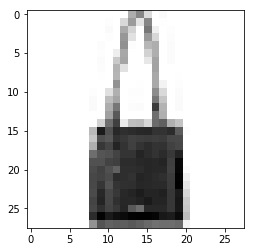

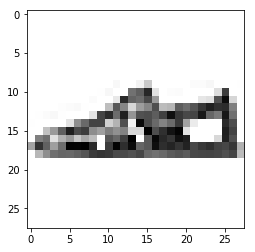

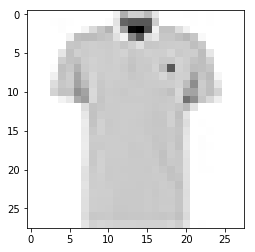

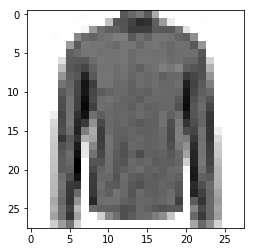

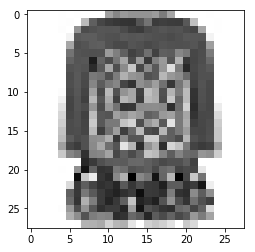

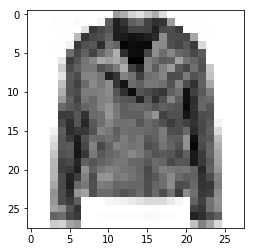

In [15]:
for i in range(200,206):
    plt.imshow(1-X_train[i][:,:,0],cmap='gray')
    plt.show()

In [16]:
def get_cnn():
    return Sequential ([
        Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape, padding = 'same'),
        Conv2D(32, kernel_size=(3,3),activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.3),
        
        Conv2D(64, kernel_size=(3,3),activation='relu', padding = 'same'),
        Conv2D(64, kernel_size=(3,3),activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.3),
        
        Conv2D(64, kernel_size=(3,3),activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.3),
        
        
        Flatten(),
        
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
        
    ])

model = get_cnn()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)    

In [17]:
history = model.fit(X_train, y_train,
          batch_size=1000,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 360s 6ms/step - loss: 1.0608 - acc: 0.6088 - val_loss: 0.5904 - val_acc: 0.7740
Epoch 2/10
60000/60000 [==============================] - 367s 6ms/step - loss: 0.5738 - acc: 0.7867 - val_loss: 0.4754 - val_acc: 0.8232
Epoch 3/10
60000/60000 [==============================] - 370s 6ms/step - loss: 0.4646 - acc: 0.8277 - val_loss: 0.3969 - val_acc: 0.8529
Epoch 4/10
60000/60000 [==============================] - 362s 6ms/step - loss: 0.4053 - acc: 0.8507 - val_loss: 0.3458 - val_acc: 0.8734
Epoch 5/10
60000/60000 [==============================] - 386s 6ms/step - loss: 0.3632 - acc: 0.8649 - val_loss: 0.3160 - val_acc: 0.8838
Epoch 6/10
60000/60000 [==============================] - 379s 6ms/step - loss: 0.3392 - acc: 0.8742 - val_loss: 0.2915 - val_acc: 0.8926
Epoch 7/10
60000/60000 [==============================] - 348s 6ms/step - 

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25884080299139023
Test accuracy: 0.9047


Learning curve

In [19]:
def draw_learning_curve(history, key='acc', ylim=(0.8, 1.01)):
    plt.figure(figsize=(12,6))
    plt.plot(history.history[key])
    plt.plot(history.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    plt.legend(['train', 'test'], loc='best')
    plt.show()

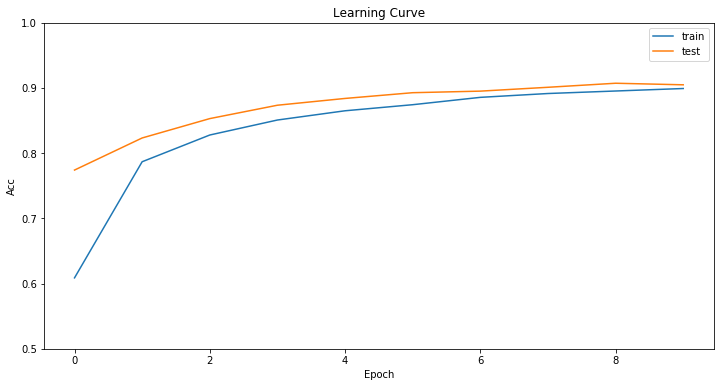

In [21]:
draw_learning_curve(history, 'acc', ylim=(0.5, 1.))

That means that model may be underfitted. The solution for this is to change Dropout values